# 2.- Chilton f0f2 & NASA Solar & Geomagnetic Data Merge

## Dr Jose Albornoz, June 2022

This notebook reads NASA solar & geomagnetic data that contains year, day of the year and hour information and converts these fields into a standard timestamp. The resulting file is then merged with cleansed f0f2 data for Chilton, UK.

# Import necessary modules

In [1]:
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
%matplotlib inline

The following is a function that receives date & time information expressed as year, month of the year, day of the year and hour of the day and converts it into a regular timestamp

In [2]:
def compose_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
                 seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

# 1.- Data Provenance

Solar & geomagnetic data was downloaded from NASA’s Space Physics Data Facility (SPDF) OMNI (Operating Missions as a Node on the Internet) https://omniweb.gsfc.nasa.gov/form/dx1.html. The following parameters are included in this dataset:

- **Scalar B, nt**: Average Scalar Interplanetary Magnetic Field (IMF). A combined measure of the magnetic field strength in the north-south, east-west, and towards-Sun vs. away-from-Sun directions (https://www.spaceweatherlive.com/en/help/the-interplanetary-magnetic-field-imf.html).
- **Vector B Magnitude, nt**: Magnitude of IMF vector, $|<B>|$
- **Bx, By, Bz**: IMF components in Geocentric Solar Ecliptic (GSE) and Geocentric Solar Magnetospheric (GSM) coordiantes (https://www.spenvis.oma.be/help/background/coortran/coortran.html#GSE)
- **RMS_magnitude, nt**: RMS standard deviation in average IMF magnitude
- **RMS_field_vector, nT**: RMS standard deviation in IMF vector
- **RMS_BX_GSE, RMS_BY_GSE, RMS_BZ_GSE**: Standard deviation in GSE X, Y and Z IMF components
- **SW Plasma Temperature, K**: Solar wind plasma temperature												
- **SW Proton Density, N/cm^3**: Solar wind proton density
- **SW Plasma Speed, km/s**: Solar wind plasma speed	
- **Alpha/Proton ratio**: He$^{++}$/H$^+$ ratio
- **sigma-T, K**: Solar wind plasma temperature	standard deviation												
- **sigma-n, N/cm^3**: Solar wind proton density standard deviation
- **sigma-V, km/s**: Solar wind plasma speed standard deviation													
- **sigma-ratio**: He$^{++}$/H$^+$ ratio standard deviation
- **Kp index**: Planetary k-index
- **R (Sunspot No.)**: Sunspot number
- **Dst-index, nT**: Disturbanse storm time index
- **ap_index, nT**: Daily average level for geomagnetic activity
- **f10.7_index**: Solar radio flux at a wavelength of 10.7 cm at the earth's orbit
- **AE-index, nT, AL-index, nT, AU-index, nT**: Auroral zone magnetic disturbance levels indices
- **pc-index**: Polar cap magnetic index
- **Lyman_alpha**: Hydrogen Lyman α emission
- **Proton flux (>1 Mev), Proton flux (>2 Mev), Proton flux (>4 Mev), Proton flux (>10 Mev), Proton flux (>30 Mev), Proton flux (>60 Mev)**: Solar proton flux
- **Flux FLAG**: Magnetospheric Flux Flag


The dataset covers from 01/02/1995 to 01/07/2006

# 1.- Read Solar & Geomagnetic Data

In [3]:
df_0 = pd.read_excel("Data/18Aug2021-Parameters.xlsm")

In [4]:
df_0.head()

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)",...,"AU-index, nT",pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG
0,1995,32,0,5.6,5.0,4.3,-2.5,-0.3,-2.1,-1.4,...,84,1.6,0.006538,2.38,1.20,0.91,0.82,0.77,0.69,-1
1,1995,32,1,5.6,4.8,4.2,-2.3,-0.5,-1.9,-1.4,...,84,1.8,0.006538,999999.99,99999.99,99999.99,99999.99,99999.99,99999.99,0
2,1995,32,2,5.3,3.6,2.0,-3.0,-0.3,-2.6,-1.5,...,121,2.6,0.006538,2.35,1.09,0.83,0.73,0.64,0.53,-1
3,1995,32,3,5.4,4.6,4.4,-0.4,1.2,-0.8,1.0,...,109,2.0,0.006538,2.48,1.08,0.77,0.69,0.62,0.51,-1
4,1995,32,4,5.4,3.8,2.8,-2.4,-0.9,-2.0,-1.6,...,83,1.2,0.006538,2.40,1.01,0.77,0.68,0.62,0.55,-1


In [5]:
df_0.describe()

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)",...,"AU-index, nT",pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG
count,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,...,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000,100272.000000
mean,2000.311393,180.393250,11.500000,10.238424,9.538883,3.681273,3.909664,3.712062,3.895671,3.651774,...,81.695279,1.334945,0.007533,398587.735918,39888.808247,39873.053707,35307.619159,35334.938141,35347.790385,-0.647140
std,3.313749,104.707694,6.922221,60.890292,60.926646,61.322239,61.340829,61.281613,61.333318,61.293639,...,74.283990,15.837755,0.001106,489547.411249,48936.891908,48949.742019,47786.133932,47799.124170,47804.202933,0.477862
min,1995.000000,1.000000,0.000000,0.600000,0.100000,-40.800000,-33.000000,-53.700000,-43.100000,-57.800000,...,-260.000000,-21.500000,0.005654,0.010000,0.020000,0.010000,0.010000,0.010000,0.010000,-1.000000
25%,1997.000000,90.000000,5.750000,4.500000,3.900000,-3.000000,-2.800000,-1.500000,-2.600000,-1.700000,...,29.000000,0.100000,0.006511,0.880000,0.800000,0.730000,0.550000,0.410000,0.310000,-1.000000
50%,2000.000000,177.000000,11.500000,5.800000,5.100000,-0.200000,0.200000,0.000000,0.200000,-0.100000,...,57.000000,0.700000,0.007340,9.875000,3.290000,1.220000,0.770000,0.660000,0.530000,-1.000000
75%,2003.000000,271.000000,17.250000,7.600000,6.900000,2.900000,3.000000,1.400000,2.900000,1.600000,...,112.000000,1.700000,0.008425,999999.990000,99999.990000,99999.990000,99999.990000,99999.990000,99999.990000,0.000000
max,2006.000000,366.000000,23.000000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,...,1226.000000,999.900000,0.010603,999999.990000,99999.990000,99999.990000,99999.990000,99999.990000,99999.990000,0.000000


In [6]:
df_0.columns.tolist()

['YEAR',
 'DOY',
 'Hour',
 'Scalar B, nT',
 'Vector B Magnitude,nT',
 'BX, nT (GSE, GSM)',
 'BY, nT (GSE)',
 'BZ, nT (GSE)',
 'BY, nT (GSM)',
 'BZ, nT (GSM)',
 'RMS_magnitude, nT',
 'RMS_field_vector, nT',
 'RMS_BX_GSE, nT',
 'RMS_BY_GSE, nT',
 'RMS_BZ_GSE, nT',
 'SW Plasma Temperature, K',
 'SW Proton Density, N/cm^3',
 'SW Plasma Speed, km/s',
 'Alpha/Prot. ratio',
 'sigma-T,K',
 'sigma-n, N/cm^3)',
 'sigma-V, km/s',
 'sigma-ratio',
 'Kp index',
 'R (Sunspot No.)',
 'Dst-index, nT',
 'ap_index, nT',
 'f10.7_index',
 'AE-index, nT',
 'AL-index, nT',
 'AU-index, nT',
 'pc-index',
 'Lyman_alpha',
 'Proton flux (>1 Mev)',
 'Proton flux (>2 Mev)',
 'Proton flux (>4 Mev)',
 'Proton flux (>10 Mev)',
 'Proton flux (>30 Mev)',
 'Proton flux (>60 Mev)',
 'Flux FLAG']

# 2.- Generate timestamp with correct format

In [7]:
df_0['Timestamp'] = compose_date(df_0['YEAR'], days=df_0['DOY'], hours = df_0['Hour'])

In [8]:
df_0.head()

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)",...,pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG,Timestamp
0,1995,32,0,5.6,5.0,4.3,-2.5,-0.3,-2.1,-1.4,...,1.6,0.006538,2.38,1.20,0.91,0.82,0.77,0.69,-1,1995-02-01 00:00:00
1,1995,32,1,5.6,4.8,4.2,-2.3,-0.5,-1.9,-1.4,...,1.8,0.006538,999999.99,99999.99,99999.99,99999.99,99999.99,99999.99,0,1995-02-01 01:00:00
2,1995,32,2,5.3,3.6,2.0,-3.0,-0.3,-2.6,-1.5,...,2.6,0.006538,2.35,1.09,0.83,0.73,0.64,0.53,-1,1995-02-01 02:00:00
3,1995,32,3,5.4,4.6,4.4,-0.4,1.2,-0.8,1.0,...,2.0,0.006538,2.48,1.08,0.77,0.69,0.62,0.51,-1,1995-02-01 03:00:00
4,1995,32,4,5.4,3.8,2.8,-2.4,-0.9,-2.0,-1.6,...,1.2,0.006538,2.40,1.01,0.77,0.68,0.62,0.55,-1,1995-02-01 04:00:00


In [9]:
df_0.tail()

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)",...,pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG,Timestamp
100267,2006,191,19,6.6,5.1,-4.7,-1.5,1.3,-1.5,1.3,...,2.4,0.006395,999999.99,99999.99,99999.99,0.17,0.07,0.05,-1,2006-07-10 19:00:00
100268,2006,191,20,5.6,3.8,-3.6,-0.3,1.2,-0.3,1.2,...,1.1,0.006395,999999.99,99999.99,99999.99,0.15,0.08,0.07,-1,2006-07-10 20:00:00
100269,2006,191,21,7.0,6.5,-1.7,-0.2,6.3,-0.5,6.3,...,-0.2,0.006395,999999.99,99999.99,99999.99,0.14,0.08,0.06,-1,2006-07-10 21:00:00
100270,2006,191,22,8.0,7.9,0.8,3.3,7.2,2.9,7.4,...,-0.5,0.006395,999999.99,99999.99,99999.99,0.17,0.09,0.05,-1,2006-07-10 22:00:00
100271,2006,191,23,8.5,8.4,2.4,4.8,6.4,4.5,6.6,...,-0.3,0.006395,999999.99,99999.99,99999.99,0.16,0.07,0.05,-1,2006-07-10 23:00:00


In [10]:
df_0['Timestamp'].min()

Timestamp('1995-02-01 00:00:00')

In [11]:
df_0['Timestamp'].max()

Timestamp('2006-07-10 23:00:00')

## 2.1.- Drop unnecessary columns

In [12]:
df_0.drop(['YEAR', 'DOY', 'Hour'], axis=1, inplace=True)

In [13]:
df_0.dtypes

Scalar B, nT                        float64
Vector B Magnitude,nT               float64
BX, nT (GSE, GSM)                   float64
BY, nT (GSE)                        float64
BZ, nT (GSE)                        float64
BY, nT (GSM)                        float64
BZ, nT (GSM)                        float64
RMS_magnitude, nT                   float64
RMS_field_vector, nT                float64
RMS_BX_GSE, nT                      float64
RMS_BY_GSE, nT                      float64
RMS_BZ_GSE, nT                      float64
SW Plasma Temperature, K              int64
SW Proton Density, N/cm^3           float64
SW Plasma Speed, km/s                 int64
Alpha/Prot. ratio                   float64
sigma-T,K                             int64
sigma-n, N/cm^3)                    float64
sigma-V, km/s                         int64
sigma-ratio                         float64
Kp index                              int64
R (Sunspot No.)                       int64
Dst-index, nT                   

# 3.- Read f0F2 data

In [14]:
df_1 = pd.read_csv("Data/Chiltonf0f2_Clean_v2.csv", index_col=False)

In [15]:
df_1['Timestamp'] = pd.to_datetime(df_1['Timestamp'])

In [16]:
df_1.head()

,Timestamp,f0f2
0,1995-03-20 15:00:00,NaN
1,1995-03-20 16:00:00,5.7
2,1995-03-20 17:00:00,5.7
3,1995-03-20 18:00:00,5.3
4,1995-03-20 19:00:00,4.8


In [17]:
df_1.dtypes

Timestamp    datetime64[ns]
f0f2                float64
dtype: object

# 4.- Join both datasets

In [18]:
df_2 = pd.merge_asof(df_0.sort_values('Timestamp'), df_1.sort_values('Timestamp'), on='Timestamp')

In [19]:
df_2.shape

(100272, 39)

In [20]:
df_3 = df_2[df_2['Timestamp'] <= '2006-06-30 23:00:00']

In [21]:
df_3.shape

(100032, 39)

In [22]:
df_3.head()

,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)","RMS_magnitude, nT","RMS_field_vector, nT","RMS_BX_GSE, nT",...,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG,Timestamp,f0f2
0,5.6,5.0,4.3,-2.5,-0.3,-2.1,-1.4,0.1,2.4,1.4,...,0.006538,2.38,1.20,0.91,0.82,0.77,0.69,-1,1995-02-01 00:00:00,NaN
1,5.6,4.8,4.2,-2.3,-0.5,-1.9,-1.4,0.2,2.6,1.9,...,0.006538,999999.99,99999.99,99999.99,99999.99,99999.99,99999.99,0,1995-02-01 01:00:00,NaN
2,5.3,3.6,2.0,-3.0,-0.3,-2.6,-1.5,0.3,3.7,2.7,...,0.006538,2.35,1.09,0.83,0.73,0.64,0.53,-1,1995-02-01 02:00:00,NaN
3,5.4,4.6,4.4,-0.4,1.2,-0.8,1.0,0.1,2.6,0.7,...,0.006538,2.48,1.08,0.77,0.69,0.62,0.51,-1,1995-02-01 03:00:00,NaN
4,5.4,3.8,2.8,-2.4,-0.9,-2.0,-1.6,0.1,3.5,1.6,...,0.006538,2.40,1.01,0.77,0.68,0.62,0.55,-1,1995-02-01 04:00:00,NaN


Text(0.5, 1.0, 'Chilton f0F2 time series')

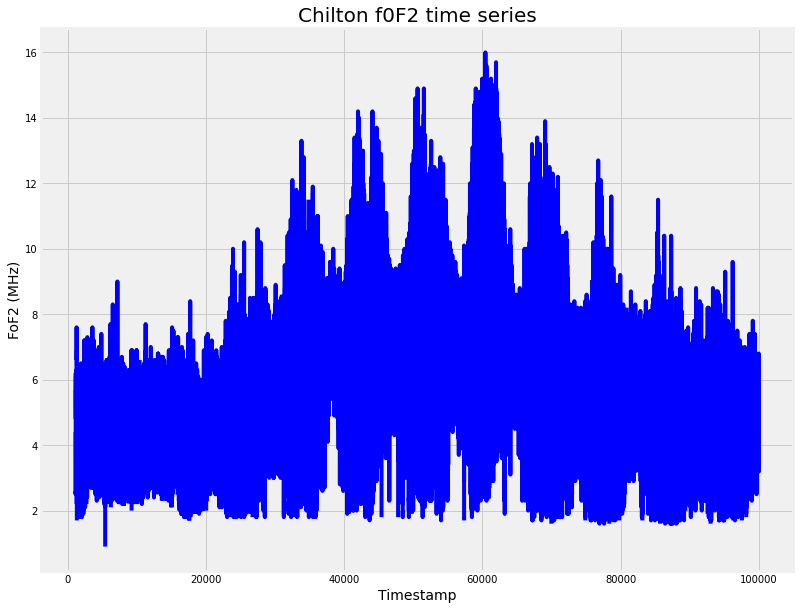

In [23]:
plt.figure(figsize=(12,10))
plt.plot(df_3.index, df_3['f0f2'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('FoF2 (MHz)', fontsize=14)
plt.title('Chilton f0F2 time series', fontsize=20)

# 5.- Reorder columns

In [24]:
cols = df_3.columns.tolist()

In [25]:
cols = cols[-2:] + cols[:-2]

In [26]:
df_4 = df_3[cols]

In [27]:
df_4.head()

,Timestamp,f0f2,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)","RMS_magnitude, nT",...,"AU-index, nT",pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG
0,1995-02-01 00:00:00,NaN,5.6,5.0,4.3,-2.5,-0.3,-2.1,-1.4,0.1,...,84,1.6,0.006538,2.38,1.20,0.91,0.82,0.77,0.69,-1
1,1995-02-01 01:00:00,NaN,5.6,4.8,4.2,-2.3,-0.5,-1.9,-1.4,0.2,...,84,1.8,0.006538,999999.99,99999.99,99999.99,99999.99,99999.99,99999.99,0
2,1995-02-01 02:00:00,NaN,5.3,3.6,2.0,-3.0,-0.3,-2.6,-1.5,0.3,...,121,2.6,0.006538,2.35,1.09,0.83,0.73,0.64,0.53,-1
3,1995-02-01 03:00:00,NaN,5.4,4.6,4.4,-0.4,1.2,-0.8,1.0,0.1,...,109,2.0,0.006538,2.48,1.08,0.77,0.69,0.62,0.51,-1
4,1995-02-01 04:00:00,NaN,5.4,3.8,2.8,-2.4,-0.9,-2.0,-1.6,0.1,...,83,1.2,0.006538,2.40,1.01,0.77,0.68,0.62,0.55,-1


# 5.- Write merged dataset to disk

In [28]:
df_4.to_csv('Data/merged_f0F2_solar_geomagnetic_v1.csv', index=False)